In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
os.chdir('C:\\RESEARCH\\LUAD\\Site')

In [3]:
X=pd.read_excel('Genes_Clinical_Site.xlsx',index_col=0)

In [4]:
X.shape

(517, 15148)

In [5]:
x=X.iloc[:,0:15146].values
y=X.iloc[:,-1].values

In [6]:
y

array(['R-Lower', 'R-Lower', 'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Lower', 'R-Middle', 'R-Upper', 'R-Lower',
       'R-Upper', 'R-Lower', 'L-Upper', 'L-Lower', 'R-Upper', 'L-Lower',
       'R-Lower', 'L-Lower', 'R-Upper', 'R-Middle', 'L-Lower', 'L-Upper',
       'L-Lower', 'R-Upper', 'L-Lower', 'R-Lower', 'L-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'L-Upper', 'L-Upper', 'L-Upper', 'R-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper', 'L-Upper',
       'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Upper', 'R-Lower',
       'L-Upper', 'R-Upper', 'R-Upper', 'R-Lower', 'R-Lower', 'L-Upper',
       'R-Upper', 'L-Lower', 'R-Upper', 'L-Lower', 'L-Lower', 'R-Upper',
       'R-Upper', 'L-Upper', 'R-Upper', 'R-Upper', 'L-Upper', 'R-Upper',
       'R-Lower', 'L-Upper', 'R-Lower', 'R-Upper'

In [7]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
labelEncoder_y = LabelEncoder()
y = labelEncoder_y.fit_transform(y.astype(str))


In [8]:
y

array([3, 3, 3, 1, 3, 5, 5, 1, 3, 4, 5, 3, 5, 3, 1, 0, 5, 0, 3, 0, 5, 4,
       0, 1, 0, 5, 0, 3, 1, 1, 5, 5, 1, 1, 5, 1, 5, 1, 5, 1, 5, 5, 5, 5,
       1, 1, 1, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 3, 1, 5, 5, 3, 3, 1,
       5, 0, 5, 0, 0, 5, 5, 1, 5, 5, 1, 5, 3, 1, 3, 5, 1, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 1, 3, 3, 1, 0, 1, 1, 5, 3, 1, 5, 1, 4, 1, 1, 5, 1, 1,
       5, 4, 0, 5, 3, 5, 1, 2, 5, 3, 1, 5, 1, 3, 3, 3, 5, 1, 0, 5, 5, 3,
       1, 5, 1, 5, 0, 1, 3, 5, 5, 5, 5, 5, 5, 5, 0, 0, 5, 1, 5, 3, 5, 3,
       5, 3, 5, 5, 5, 5, 1, 1, 3, 0, 5, 5, 5, 3, 1, 3, 1, 5, 0, 5, 0, 4,
       1, 3, 1, 3, 0, 0, 1, 3, 0, 3, 4, 5, 3, 5, 5, 5, 5, 1, 3, 0, 1, 1,
       3, 5, 3, 1, 0, 4, 0, 5, 5, 1, 0, 5, 5, 3, 3, 5, 1, 1, 5, 3, 1, 3,
       5, 0, 5, 5, 3, 3, 3, 5, 5, 5, 3, 5, 3, 0, 5, 1, 4, 5, 3, 1, 0, 0,
       0, 5, 5, 0, 5, 5, 3, 3, 5, 1, 0, 5, 3, 3, 1, 5, 3, 1, 0, 1, 3, 0,
       3, 5, 1, 3, 3, 3, 4, 5, 4, 5, 5, 1, 5, 0, 5, 5, 5, 1, 5, 0, 0, 3,
       3, 4, 1, 3, 0, 4, 5, 5, 4, 1, 5, 5, 5, 3, 3,

In [9]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)
X_test = sc.transform(X_test)

In [11]:
# Fitting Decision Tree Classification to the training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:

# Predicting the Validation set results
y_val_pred = classifier.predict(X_val)

In [15]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_val, y_val_pred)
accuracy = ((cm[0][0]+cm[1][1]+cm[2][2]+cm[3][3]+cm[4][4]+cm[5][5]) / cm.sum())
accuracy

0.6024096385542169

Confusion Matrix, without normalization
[[ 5  0  0  3  0  0]
 [ 0  7  0  0  0 11]
 [ 0  0  0  0  0  1]
 [10  1  0  9  0  0]
 [ 0  0  0  0  5  0]
 [ 1  6  0  0  0 24]]


<Figure size 720x504 with 0 Axes>

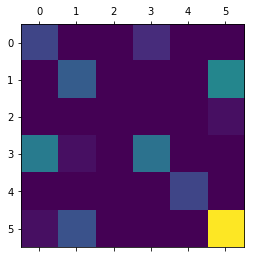

In [16]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


Normalized confusion matrix
[[0.625      0.         0.         0.375      0.         0.        ]
 [0.         0.38888889 0.         0.         0.         0.61111111]
 [0.         0.         0.         0.         0.         1.        ]
 [0.5        0.05       0.         0.45       0.         0.        ]
 [0.         0.         0.         0.         1.         0.        ]
 [0.03225806 0.19354839 0.         0.         0.         0.77419355]]


<Figure size 432x288 with 0 Axes>

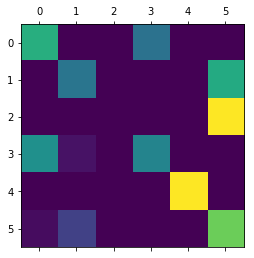

In [17]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [18]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.31      0.62      0.42         8
           1       0.50      0.39      0.44        18
           2       0.00      0.00      0.00         1
           3       0.75      0.45      0.56        20
           4       1.00      1.00      1.00         5
           5       0.67      0.77      0.72        31

   micro avg       0.60      0.60      0.60        83
   macro avg       0.54      0.54      0.52        83
weighted avg       0.63      0.60      0.60        83



C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [19]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_val, y_val_pred)

0.47377291379048864

In [20]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
accuracies.mean()

C:\Users\Kanika Saini\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


0.49379595288750877

In [ ]:

# Applying Grid Search
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier() 


parameter_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}      

classifier = DecisionTreeClassifier()           

grid_search = GridSearchCV(classifier, param_grid = parameter_grid,
                           cv = 5, n_jobs = -1, verbose = 1)

grid_search.fit(X_train, y_train)

Best_Score = grid_search.best_score_
Best_Param = grid_search.best_params_

# Applying Random Search 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
classifier = DecisionTreeClassifier() 

# Create the random grid
random_grid = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [3, 4, 5, 6, 7 , 8],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.1, 0.2, 0.3],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [20, 25, 30, 35, 40],
                  "min_weight_fraction_leaf": [0.1, 0.2, 0.3, 0.4],
                  "presort": [False],
                  "random_state": [3, 4, 5, 10, 15]}
               
random_search = RandomizedSearchCV(estimator=classifier, param_distributions=random_grid,
                              n_iter = 100,scoring='neg_mean_absolute_error',
                              cv = 10, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

random_search.fit(X_train, y_train)

Random_Best_Param = random_search.best_params_
Random_Best_Score = random_search.best_score_

# Applying Bayesian Search
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
from skopt import BayesSearchCV
search_spaces = {"class_weight": [None],
                  "criterion": ["gini", "entropy"],
                  "max_depth": [2, 5],
                  "max_features": [1, 2, 3, 4],
                  "max_leaf_nodes":[2, 3, 4, 5, 10, 20],
                  "min_impurity_decrease": [0.0, 0.1, 0.2],
                  "min_impurity_split": [None],
                  "min_samples_leaf": [1,2,3,4,5],
                  "min_samples_split": [5, 10, 20, 25, 30],
                  "min_weight_fraction_leaf": [0.0, 0.1, 0.2],
                  "presort": [False],
                  "random_state": [0, 1, 2, 3]}

class BayesSearchCV(BayesSearchCV):
    def _run_search(self, x): raise BaseException('Use newer skopt')

opt = BayesSearchCV(classifier, search_spaces, scoring="accuracy", cv = 10, n_jobs=1, random_state=0)
opt.fit(X_train, y_train)

Bayes_Best_Param = opt.best_params_
Bayes_Best_Score = opt.best_score_

In [ ]:
################### Testing set ###########################

In [ ]:
# Fitting Decision Tree Classification to the Testing Set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
accuracy = ((cm[0][0]+cm[1][1]) / cm.sum())

In [ ]:
# np.set_printoptions(precision=2)
print('Confusion Matrix, without normalization')
print(cm)
plt.figure(figsize = (10,7))
plt.matshow(cm)


In [ ]:
# Normalize the confusion matrix by row (i.e. by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1) [:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plt.matshow(cm_normalized)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

In [ ]:

# Matthews Correlation Coefficient Calculation #
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, y_pred)


In [ ]:

# ROC Curve Implementation
import scikitplot as skplt
y_pred = classifier.predict(X_test)
preds = y_pred[:,]
fpr, tpr, threshold = skplt.metrics.roc_curve(y_test, preds)
roc_auc = skplt.metrics.auc(fpr, tpr)

In [ ]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
